In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import anndata as ad
import squidpy as sq
import scanpy as sc

import os

from matplotlib import pyplot as plt

In [3]:
filename = '/home/mdistasio/YaleGoogleDrive/DiStasio Lab Share/03 Data/Retina_SlideSeq_Curio/A22_3781_AMD_SlideSeq_001/A0052_029_anndata_annotated.h5ad'
adata = ad.read_h5ad(filename)

retina1 = adata[adata.obs['Retina_1']]
retina2 = adata[adata.obs['Retina_2']]

filename = '/home/mdistasio/YaleGoogleDrive/DiStasio Lab Share/03 Data/Retina_SlideSeq_Curio/A23-1279_OS_Ctrl_SlideSeq_001/A0052_030_anndata_annotated.h5ad'
adata = ad.read_h5ad(filename)

retina3 = adata[adata.obs['Retina']]

In [4]:
IMGDIR = '/home/mdistasio/YaleGoogleDrive/DiStasio Lab Share/02 Analysis/annData_ManualAnnotate/img/'

In [5]:
# QC
retina1.var["mt"] = retina1.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(retina1, qc_vars=["mt"], inplace=True)

## Normalize
print('Normalizing...')
sc.pp.normalize_total(retina1, target_sum=1e4)
sc.pp.log1p(retina1)

## Filtering
print('Filtering...')
#sc.pp.filter_cells(retina1, min_genes=200)
sc.pp.filter_genes(retina1, min_cells=3)



# QC
retina2.var["mt"] = retina2.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(retina2, qc_vars=["mt"], inplace=True)

## Normalize
print('Normalizing...')
sc.pp.normalize_total(retina2, target_sum=1e4)
sc.pp.log1p(retina2)

## Filtering
print('Filtering...')
#sc.pp.filter_cells(retina1, min_genes=200)
sc.pp.filter_genes(retina2, min_cells=3)




# QC
retina3.var["mt"] = retina3.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(retina3, qc_vars=["mt"], inplace=True)

## Normalize
print('Normalizing...')
sc.pp.normalize_total(retina3, target_sum=1e4)
sc.pp.log1p(retina2)

## Filtering
print('Filtering...')
#sc.pp.filter_cells(retina1, min_genes=200)
sc.pp.filter_genes(retina3, min_cells=3)


Normalizing...
Filtering...
Normalizing...
Filtering...
Normalizing...
Filtering...


In [6]:
r_all = {"R1": retina1, "R2": retina2, "R3": retina3}
retinas_all = ad.concat(r_all, label="dataset", join='outer')

# Clean up the NAs in manual annotation columns in adata.obs, which should be boolean                                                                                                                                                                                                        
cs = retinas_all.obs.select_dtypes(include='object').columns                                                                                                                                                                                                                                       
retinas_all.obs[cs] = retinas_all.obs[cs].astype('boolean').fillna(False)                                                                                                                                                                                                                                
                                                                                                                                                                                                                                                                                             
retinas_all.raw = retinas_all                                                                                                                                                                                                                                                                           
retinas_all.layers["counts"] = retinas_all.X.copy()   

In [ ]:
sc.pp.log1p(retinas_all)

## Clustering
print('Clustering...')
sc.tl.pca(retinas_all, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retinas_all, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retinas_all)
sc.tl.paga(retinas_all)
sc.pl.paga(retinas_all, plot=False)
sc.tl.umap(retinas_all, init_pos='paga')

print('Done!')

Clustering...


In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="leiden", size=1, shape=None, ax=ax)
fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_1.png'), dpi=300)

fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="leiden", size=1, shape=None, ax=ax)
fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_2.png'), dpi=300)

fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="leiden", size=1, shape=None, ax=ax)
fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_21.png'), dpi=300)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="APOE", size=5, shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="TREM2", size=5, shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_1.png'), dpi=300)

fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="APOE", size=5, shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="TREM2", size=5, shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_2.png'), dpi=300)

fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="APOE", size=5, shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="TREM2", size=5, shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_3.png'), dpi=300)

In [84]:
import re

gene_pattern = 'CD'
gene_regex = re.compile(gene_pattern)

matching_genes = [gene_name for gene_name in retinas_all.var_names if gene_regex.search(gene_name)]

if matching_genes:
    print(f"Genes matching the pattern '{gene_pattern}':")
    for matching_gene in matching_genes:
        print(matching_gene)
else:
    print(f"No genes found matching the pattern '{gene_pattern}'.")

Genes matching the pattern 'CD':
ABCD2
ABCD3
ABCD4
ACD
APCDD1
BCDIN3D
BICD1
BICD2
BRICD5
C2CD2
C2CD2L
C2CD3
C2CD4C
C2CD5
CCDC101
CCDC102B
CCDC104
CCDC106
CCDC108
CCDC109B
CCDC11
CCDC110
CCDC112
CCDC113
CCDC114
CCDC115
CCDC117
CCDC12
CCDC120
CCDC121
CCDC122
CCDC124
CCDC125
CCDC126
CCDC127
CCDC13
CCDC13-AS1
CCDC130
CCDC132
CCDC136
CCDC137
CCDC14
CCDC141
CCDC142
CCDC144B
CCDC144CP
CCDC146
CCDC148
CCDC149
CCDC15
CCDC151
CCDC152
CCDC154
CCDC155
CCDC157
CCDC159
CCDC163P
CCDC167
CCDC170
CCDC171
CCDC172
CCDC173
CCDC174
CCDC175
CCDC176
CCDC18
CCDC181
CCDC183
CCDC22
CCDC23
CCDC24
CCDC25
CCDC28A
CCDC28B
CCDC3
CCDC30
CCDC34
CCDC39
CCDC40
CCDC41
CCDC43
CCDC47
CCDC50
CCDC51
CCDC53
CCDC57
CCDC58
CCDC59
CCDC6
CCDC60
CCDC61
CCDC62
CCDC64
CCDC65
CCDC66
CCDC68
CCDC69
CCDC7
CCDC71
CCDC71L
CCDC77
CCDC80
CCDC82
CCDC84
CCDC85B
CCDC85C
CCDC86
CCDC88A
CCDC88B
CCDC88C
CCDC89
CCDC9
CCDC90B
CCDC91
CCDC92
CCDC93
CCDC94
CCDC96
CCDC97
CD14
CD151
CD163
CD163L1
CD164
CD200
CD209
CD27
CD27-AS1
CD276
CD2AP
CD2BP2
CD300A

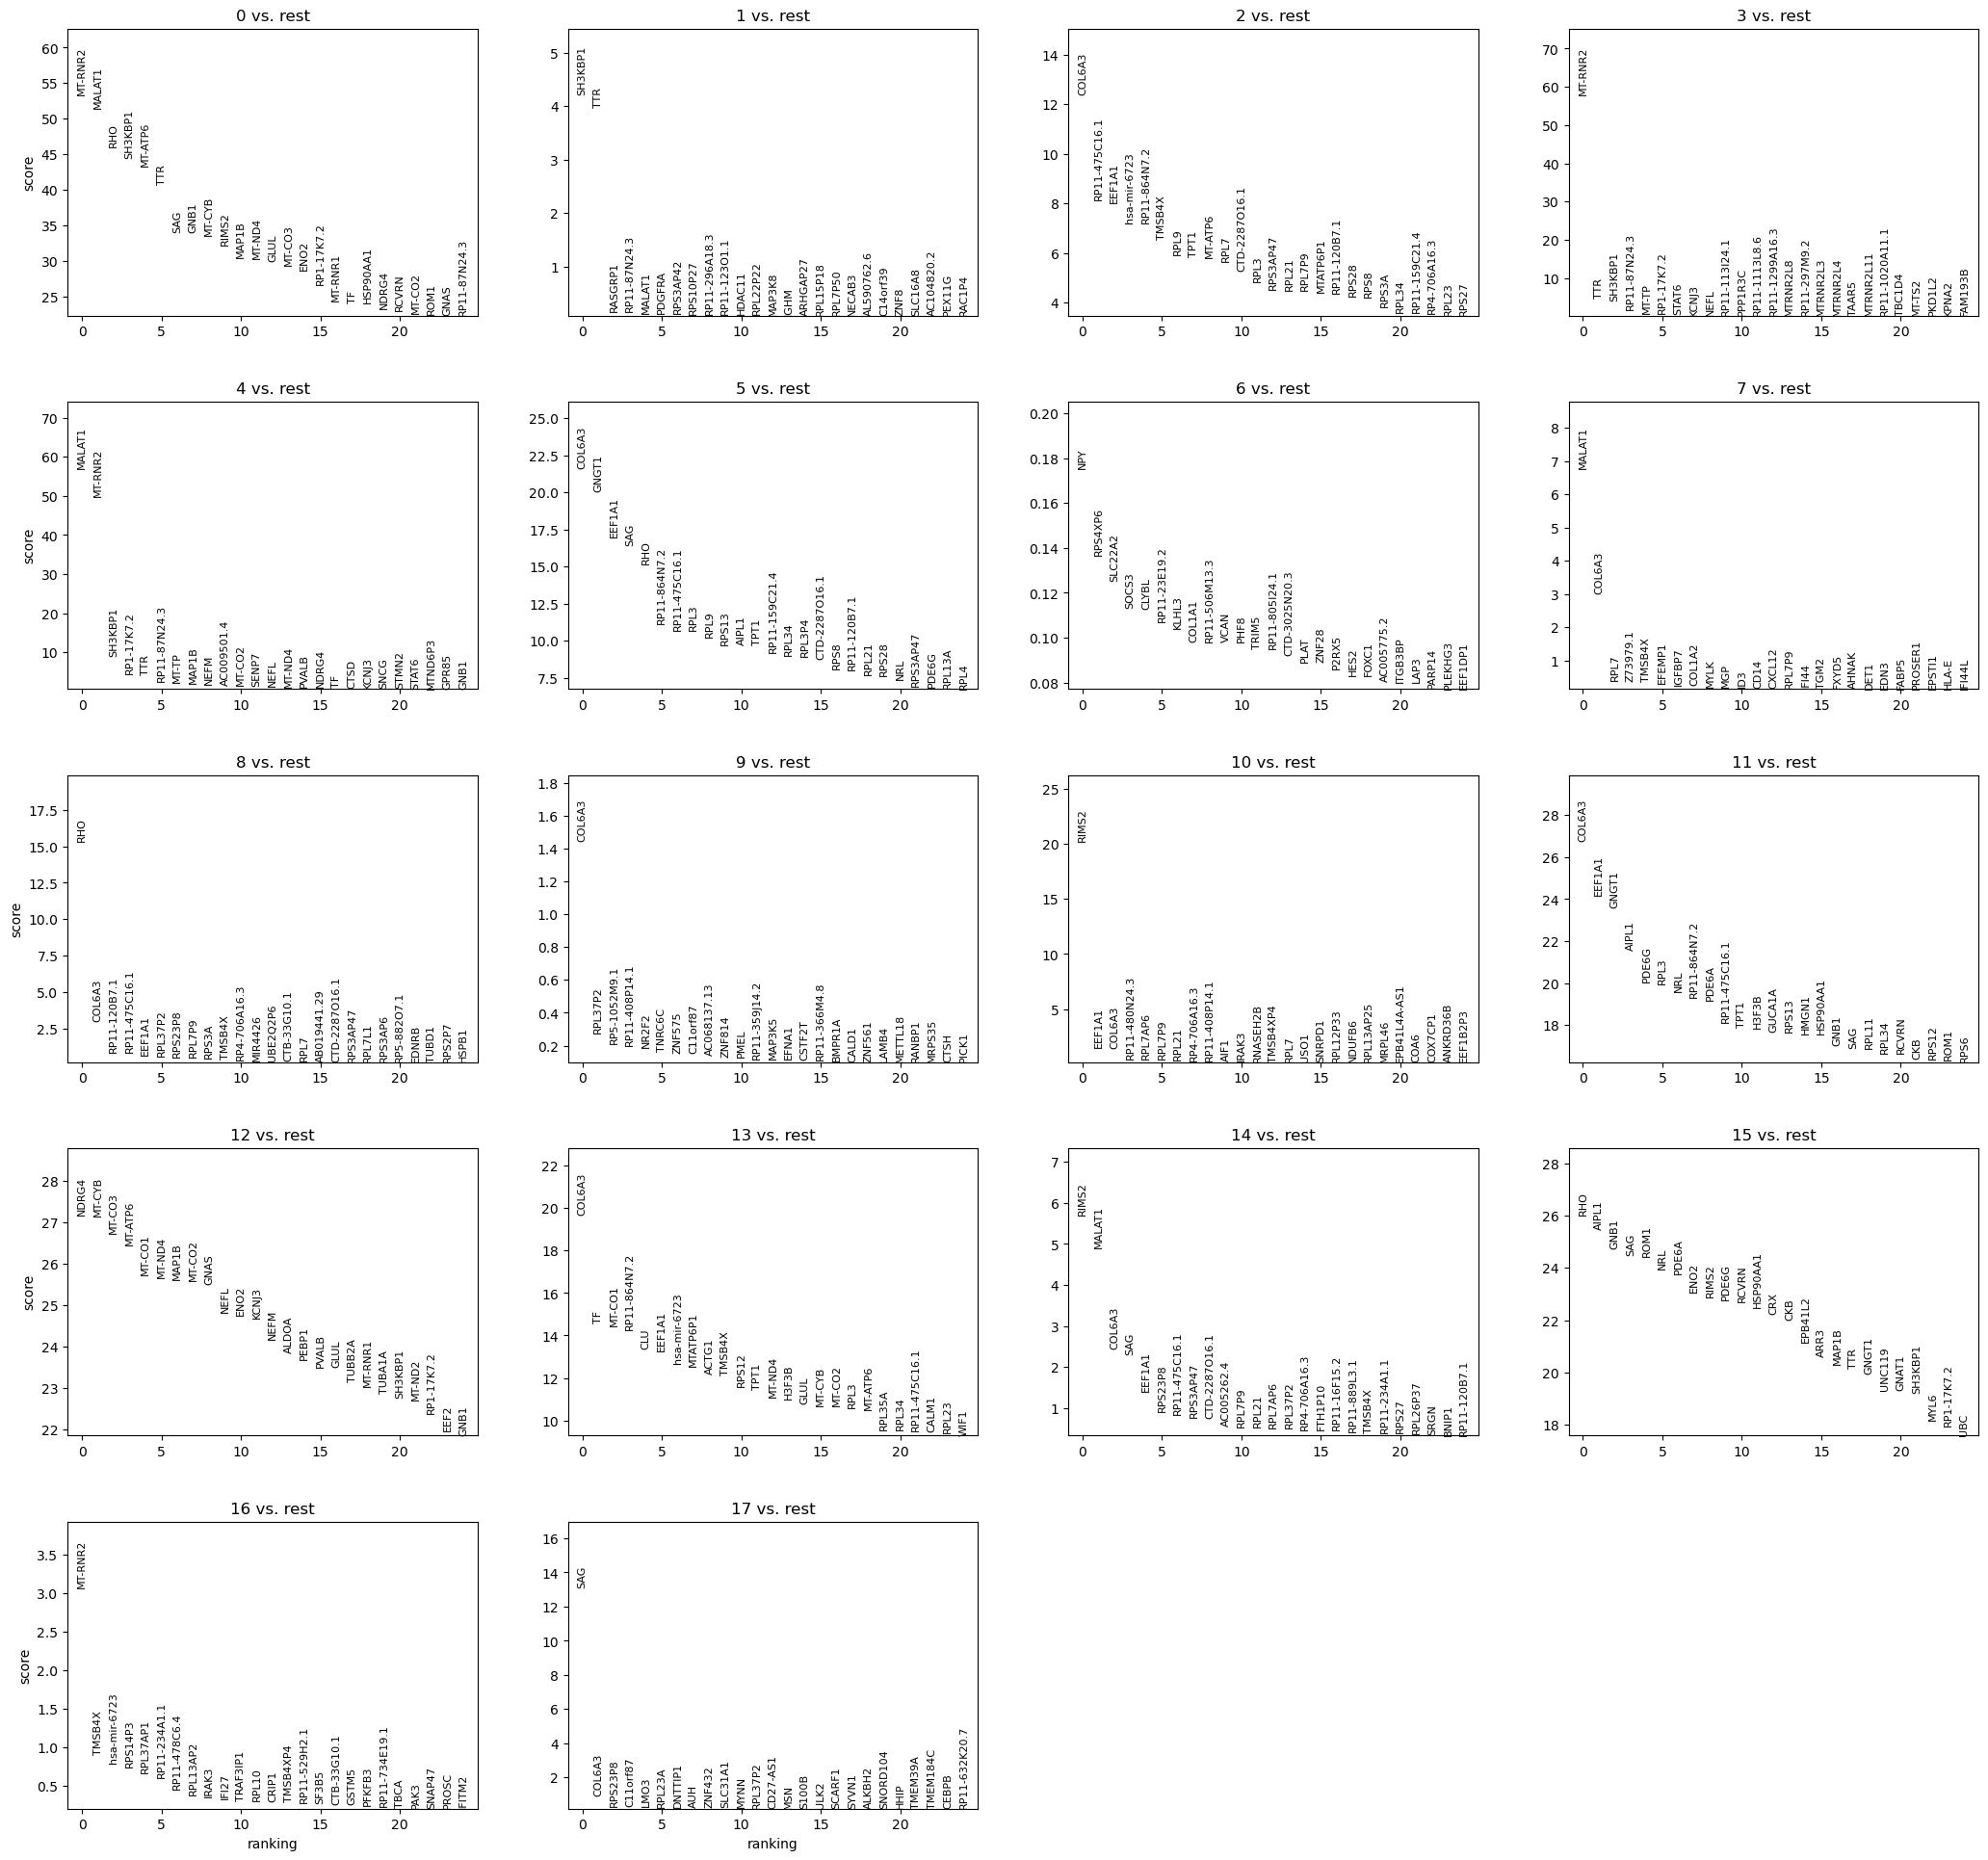

In [60]:
sc.tl.rank_genes_groups(retinas_all, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retinas_all, n_genes=25, sharey=False)

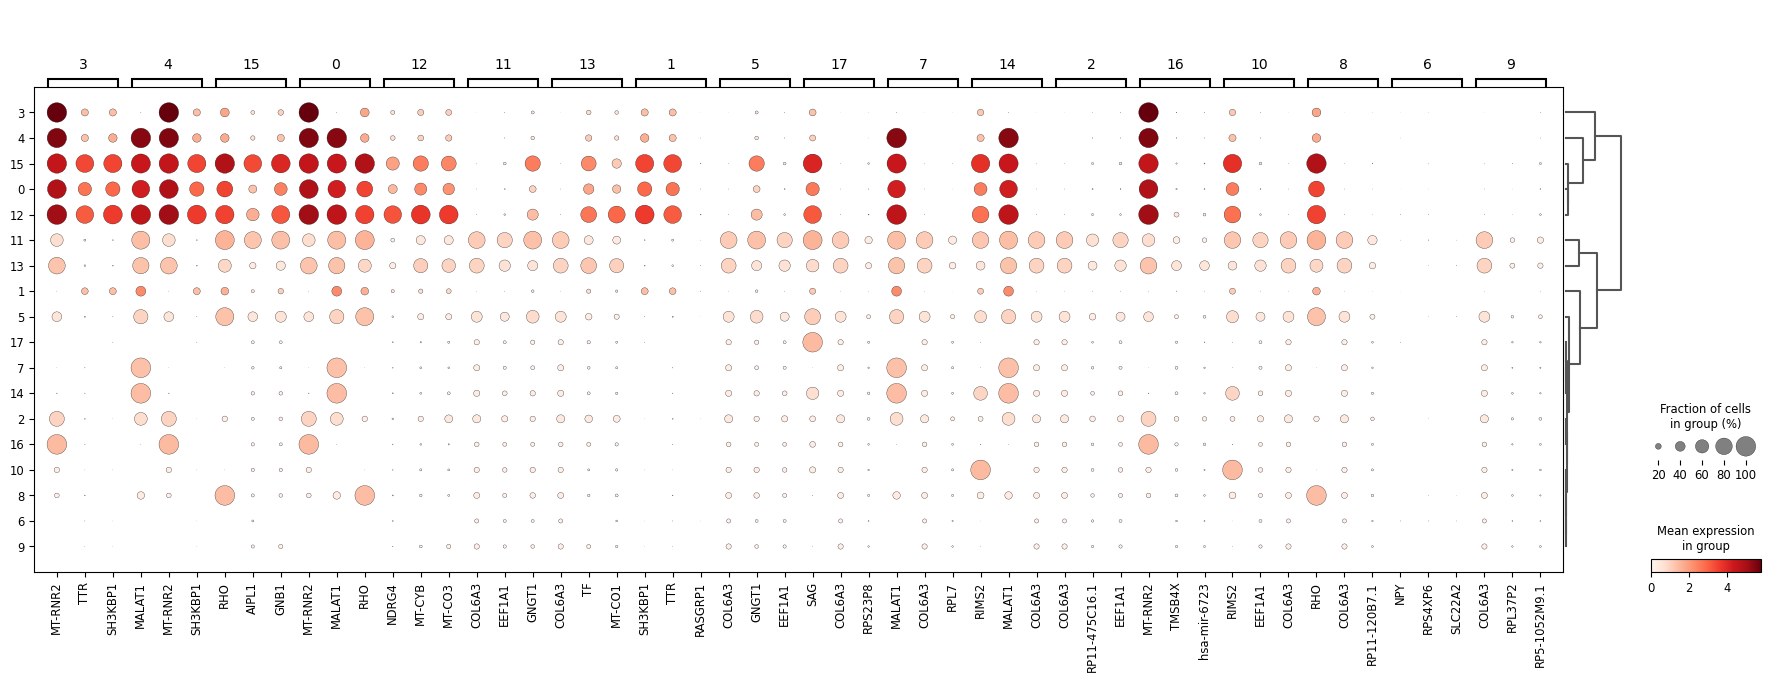

In [65]:
sc.pl.rank_genes_groups_dotplot(retinas_all, n_genes=3)

KeyError: "Spatial key 'spatial' not found in `adata.uns`."

In [14]:


## Clustering
print('Clustering...')
sc.tl.pca(retina1, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina1, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina1)
sc.tl.paga(retina1)
sc.pl.paga(retina1, plot=False)
sc.tl.umap(retina1, init_pos='paga')

print('Done!')



## Clustering
print('Clustering...')
sc.tl.pca(retina2, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina2, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina2)
sc.tl.paga(retina2)
sc.pl.paga(retina2, plot=False)
sc.tl.umap(retina2, init_pos='paga')

print('Done!')



## Clustering
print('Clustering...')
sc.tl.pca(retina3, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina3, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina3)
sc.tl.paga(retina3)
sc.pl.paga(retina3, plot=False)
sc.tl.umap(retina3, init_pos='paga')

print('Done!')

Clustering...
Done!
Clustering...
Done!
Clustering...
Done!


In [ ]:
sc.tl.rank_genes_groups(retina1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina1, n_genes=25, sharey=False)

In [ ]:

new_cluster_names = [
    'Photoreceptor (RHO, SAG, GNB1)', 
    'Photoreceptor (Cones); RIMS2',
    'Muller Glia', 
    'TF photorecptor',
    'Muller/RGC (MALAT-1)',
    'Photoreceptor (RHO)',
    'COL6A3/EEF1A1',
    'RGCs',
    '? RGC Progenitor (TPT1)',
    'Ribosomal protein L3',
    'Ribosomal proteins 1',
    'Ribosomal proteins 2',
    'Ribosomal proteins 3',
    'Other']
retina1.rename_categories('leiden', new_cluster_names)

sq.pl.spatial_scatter(retina1, color="leiden", size=1, shape=None)

In [ ]:
sq.pl.spatial_scatter(
    retina1,
    shape=None,
    color='leiden',
    groups=['RPE (MT-RNR2)','Photoreceptor (RHO, SAG, GNB1)',  'TF photorecptor', 'Outer plexiform'],
    size=3,
)


In [ ]:
sc.tl.rank_genes_groups(retina2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina2, n_genes=25, sharey=False)

In [ ]:
fig = sq.pl.spatial_scatter(retina2, color="leiden", size=1, shape=None, return_fig=True)
fig.savefig(os.path.join(IMGDIR,'Retina2.png'), dpi=300)

In [ ]:
sc.tl.rank_genes_groups(retina3, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina3, n_genes=25, sharey=False)

In [ ]:
sq.pl.spatial_scatter(retina3, color="leiden", size=1, shape=None)